# Curve Fitting: Sinusoid

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

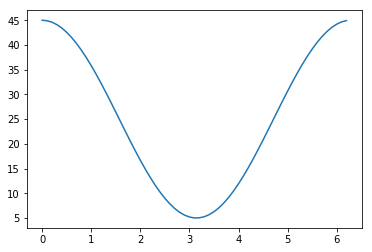

In [3]:
x = np.arange(0,2*np.pi,0.1)
super_simple_wave = lambda x, a, b: a + b * np.cos(x)

plt.plot(x, super_simple_wave(x, 25, 20))
plt.show()

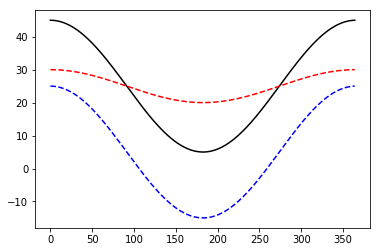

0
182


In [4]:
simple_wave = lambda x, a, b: a + b * np.cos(2*np.pi*(x)/365)
doy = np.arange(0,365,1)

plt.plot(doy, simple_wave(doy, 25, 20), '-k')
plt.plot(doy, simple_wave(doy, 5, 20), '--b')
plt.plot(doy, simple_wave(doy, 25, 5), '--r')
plt.show()

# Peak is at 0 DOY and minimum is at 182 (pi, 2*pi*182/365)

print(np.argmax(simple_wave(doy, 25, 20)))
print(np.argmin(simple_wave(doy, 25, 20)))

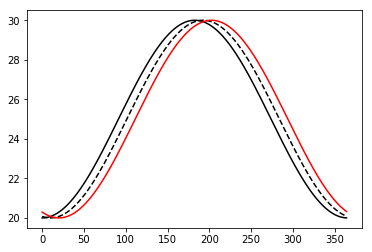

In [5]:
# How do we shift the curve?
# Add new parameter c
# c means day of highest temperature since July 1 (DOY 182)
# Shift by pi (half way). If we shift by 2*pi we will end up in the same location
wave = lambda x, a, b, c: a + b * np.cos(2*np.pi*(x-c)/365 - np.pi)

plt.plot(doy, wave(doy, 25, 5, 0), '-k')
plt.plot(doy, wave(doy, 25, 5, 10), '--k')
plt.plot(doy, wave(doy, 25, 5, 20), '-r')
plt.show()

In [6]:
# Fit temperature model to actual temperature data
mesonet_data = pd.read_csv("../datasets/gypsum_ks_daily_2018.csv")
mesonet_data.head(5)


,TIMESTAMP,STATION,PRESSUREAVG,PRESSUREMAX,PRESSUREMIN,SLPAVG,TEMP2MAVG,TEMP2MMIN,TEMP2MMAX,TEMP10MAVG,...,SOILTMP10MAX,SOILTMP10MIN,SOILTMP5AVG655,SOILTMP10AVG655,SOILTMP20AVG655,SOILTMP50AVG655,VWC5CM,VWC10CM,VWC20CM,VWC50CM
0,1/1/18 0:00,Gypsum,99.44,100.03,98.73,104.44,-15.15,-19.56,-11.00,-15.31,...,-1.18,-2.45,-1.33,-1.14,0.74,3.50,0.1377,0.1167,0.2665,0.2203
1,1/2/18 0:00,Gypsum,99.79,100.14,99.40,104.88,-16.48,-22.10,-10.40,-16.38,...,-1.56,-3.46,-2.10,-1.82,0.28,3.13,0.1234,0.1021,0.2642,0.2196
2,1/3/18 0:00,Gypsum,98.87,99.52,97.94,103.81,-11.03,-20.64,-2.71,-10.66,...,-1.49,-3.61,-2.21,-1.93,-0.08,2.76,0.1206,0.0965,0.2353,0.2189
3,1/4/18 0:00,Gypsum,98.22,98.54,97.90,102.99,-5.83,-11.79,0.24,-5.01,...,-0.98,-2.67,-1.60,-1.46,-0.21,2.45,0.1235,0.0973,0.2094,0.2182
4,1/5/18 0:00,Gypsum,98.10,98.42,97.75,102.88,-4.73,-14.22,5.36,-4.23,...,-0.72,-2.81,-1.54,-1.38,-0.25,2.25,0.1249,0.0976,0.2047,0.2180


In [7]:
mesonet_data.TEMP2MAVG.fillna(method='ffill', inplace=True)

Text(0,0.5,'Air temperature °C')

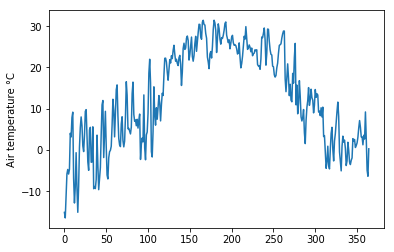

In [8]:
plt.plot(mesonet_data.TEMP2MAVG)
plt.ylabel("Air temperature " + u"\N{DEGREE SIGN}" + "C")

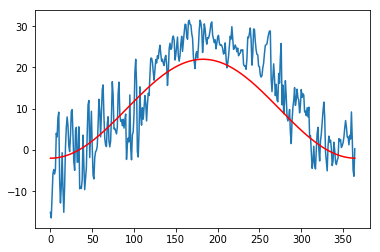

In [9]:
plt.plot(mesonet_data.TEMP2MAVG)
plt.plot(doy, wave(doy, 10, 12, 0), '-r')
plt.show()

In [10]:
# Fit sinusoidal model
lb = [-10,5,0]
ub = [20,30,365]
par0 = [10,10,10]

par = curve_fit(wave, doy, mesonet_data.TEMP2MAVG, par0, bounds=(lb,ub))
print(par[0])


[12.6619452  14.81119575 12.45559217]


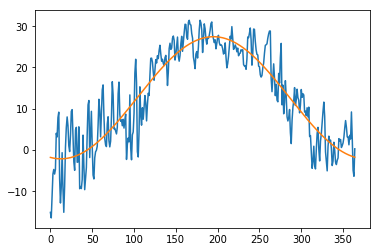

In [11]:
plt.plot(mesonet_data.TEMP2MAVG)
plt.plot(wave(doy, *par[0]))
plt.show()


In [12]:
residuals = mesonet_data.TEMP2MAVG - wave(doy, *par[0])
print(residuals.mean())


4.642629090300308e-09


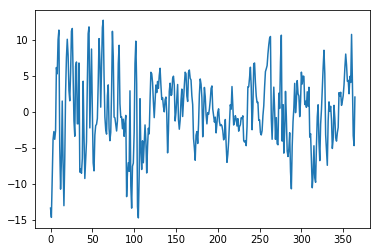

In [13]:
plt.plot(residuals)
plt.show()